# Neural Network

โครงข่ายประสาทเทียมเป็นการจำลองการทำงานของระบบเครือข่ายประสาทของมนุษย์ให้กลายเป็นรูปแบบฟังก์ชันตามคณิตศาสตร์ แม้ว่าโครงข่ายประสาทกับโครงข่ายประสาทจะแตกต่างกัน แต่การทำงานมีลักษณะคล้ายกัน

เราจะมาสร้างโครงข่ายประสาทเทียมแบบง่าย ๆ ด้วย numpy ใน python กัน

## Import

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
%matplotlib inline

## Train Data

In [2]:
import numpy as np
feature_set = np.array([[0,1,0],[0,0,1],[1,0,0],[1,1,0],[1,1,1]])
labels = np.array([[1,0,0,1,1]]).T

In [3]:
labels

array([[1],
       [0],
       [0],
       [1],
       [1]])

## สร้าง weights และ bias

เราจะใช้ฟังก์ชันของ numpy ในการสร้าง weights และ bias ด้วยฟังก์ชัน np.random.rand()

ฟังก์ชัน np.random.rand() เป็นฟังก์ชันใช้สร้าง array จากค่าสุ่มระหว่าง 0 ถึง 1 หากใส่มิติลงไป จะสร้าง array จากการสุ่ม ตาม แถว*หลัก

### Layer 1

In [4]:
np.random.seed(42)
weights1 = np.random.rand(3,8)
bias1 = float(np.random.rand(1))
lr = 0.05

In [5]:
print(weights1)
print(bias1)

[[0.37454012 0.95071431 0.73199394 0.59865848 0.15601864 0.15599452
  0.05808361 0.86617615]
 [0.60111501 0.70807258 0.02058449 0.96990985 0.83244264 0.21233911
  0.18182497 0.18340451]
 [0.30424224 0.52475643 0.43194502 0.29122914 0.61185289 0.13949386
  0.29214465 0.36636184]]
0.45606998421703593


In [6]:
float(np.random.rand(1))

0.7851759613930136

### Layer 2

In [7]:
weights2 = np.random.rand(8,1)
bias2 =float(np.random.rand(1))
print(weights2)
print(bias2)

[[0.19967378]
 [0.51423444]
 [0.59241457]
 [0.04645041]
 [0.60754485]
 [0.17052412]
 [0.06505159]
 [0.94888554]]
0.9656320330745594


## Activation function

แบ่งออกได้เป็น 2 ชนิด

1. Linear Activation function ex A=cX
2. Non-Linear Activation function ex Sigmoid, ReLU ...

In [8]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [9]:
def sigmoid_der(x):
    return sigmoid(x)*(1-sigmoid(x))

## จำนวนรอบในการ train

In [10]:
ep=10000

## Train

ANN เราประกอบไปด้วย feedforward (แพร่ไปข้างหน้าจาก X ไป Y ตาม  layer แต่ละ layer) จากสมการ Y_hat = F(X) + B ในที่นี้ F(x) = WX

โดย

- X เป็นข้อมูล X
- Y เป็นข้อมูล target ที่ต้องการ
- Y_hat เป็นผลลัพธ์ที่ได้จากแต่ละ layer
- F(X) เป็นฟังก์ชัน
- W เป็น weights หรือ ค่าน้ำหนัก
- B เป็น bias

ไม่จำเป็นต้องเป็น wx+b เสมอไป โดยเป็นอะไรก็ได้ที่หา derivative ได้ - พี่ชารินทร์

พอ feedforward มาจนถึง output layer แล้ว เราจะหา Loss หรือค่าความผิดพลาดจาก ANN ในที่นี้ เราจะใช้สมการ loss = y_hat - y

โดย

- y_hat คือ ผลลัพธ์ที่ได้จาก output layer
- y เป็นข้อมูลผลเฉลย

เสร็จแล้วเราจะมาใช้ back-propagation กัน

back-propagation เป็นกระบวนการปรับปรุง weights และ bias แต่ละ layer โดยอาศัยหลักการของ gradient descent method เพื่อให้ความผิดพลาดน้อยที่สุด

In [11]:
errors=[]

In [12]:
for epoch in tqdm(range(ep)):
    inputs = feature_set
    # 1 layer
    #feedforward
    layer1 = sigmoid(np.dot(inputs, weights1) + bias1)
    # 2 layer
    layer2 = sigmoid(np.dot(layer1, weights2) + bias2)
    # backpropagation step 1
    error = layer2 - labels
    #print(error.sum())
    errors.append(error.sum())
    # backpropagation step 2
    layer2_delta = error * sigmoid_der(layer2)
    layer1_delta = layer2_delta.dot(weights2.T) * sigmoid_der(layer1)
    weights2 -= lr * layer1.T.dot(layer2_delta)
    weights1 -= lr * inputs.T.dot(layer1_delta)
    for num in layer2_delta:
        bias2 -= lr * num
    for num in layer1_delta:
        bias1 -= lr * num

100%|██████████████████████████████████████████████████████████████████████████| 10000/10000 [00:01<00:00, 5932.19it/s]


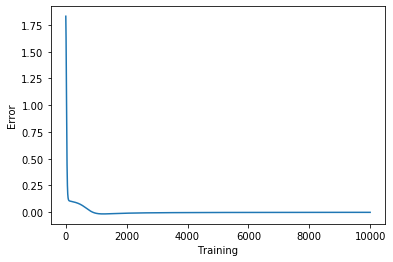

In [13]:
plt.plot(errors)
plt.xlabel('Training')
plt.ylabel('Error')
plt.show()

## ทำนาย

In [14]:
single_point = np.array([0,1,0])
result = sigmoid(np.dot(single_point, weights1) + bias1)
result = sigmoid(np.dot(result, weights2) + bias2)
print(result)

[0.99749269]


จะเห็นได้ว่า หากต้องการทำนายข้อมูลจาก ANN ให้ใช้ feedforward แบบที่ใช้ในการ train